In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import itertools
from sklearn import metrics 
mpl.rcParams['font.sans-serif'] = ['SimHei']
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from pmdarima.arima import auto_arima

# 磁盘数据

In [3]:
#获取数据
path = "../disk-new/disk/"
D_disk = []
D_disk_test = list()
D_disk_train = []
C_disk = []
C_disk_test = list()
C_disk_train = []
dict_d = {}
dict_d1 = {}
dict_t = {}
for file in os.listdir(path):
    with open(path+file) as fi:
        for line in fi:         
            arr = line.split(" ")
            if arr[0]=="C:" :                                            #C盘或者D盘
                time = arr[2]+':'+arr[3][:-3]             
                dict_d.setdefault(arr[2],[]).append(arr[3][:-3])         #日期和时间的映射
                dict_t.setdefault(arr[2],[]).append(float(arr[1]))       #日期和数值的映射
                dict_d1[time] = float(arr[1])                            # 时间和数值的映射

In [4]:
#按照天粒度对缺失值进行统计（每天记录多少数据）
d = {}
for k,v in dict_d.items():
    d.setdefault('时间',[]).append(k[:])
    d.setdefault('数量',[]).append(len(v))
d_new = pd.DataFrame(d)

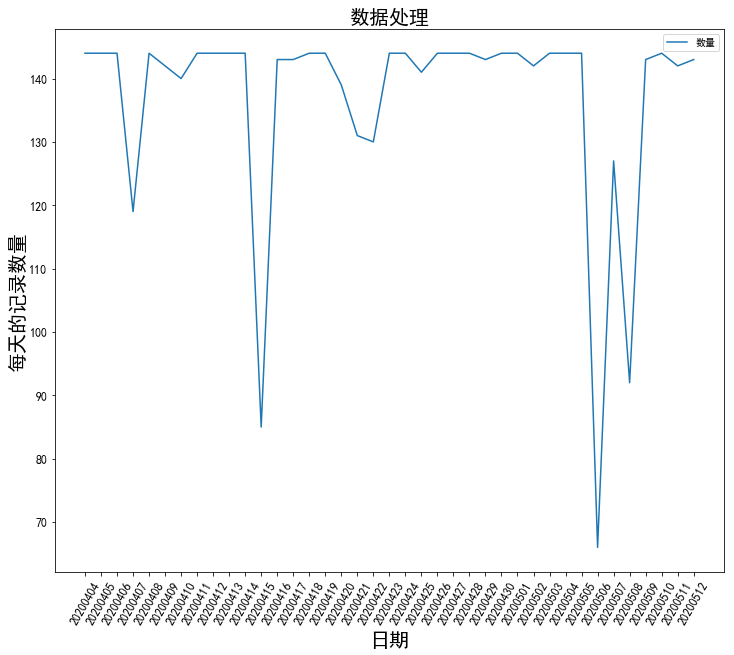

In [5]:
#展示，（排除第一天和最后一天）
plt.figure(figsize=(12, 10))
plt.plot(d_new[1:-1]['时间'],d_new[1:-1]['数量'])
plt.xticks(d_new[1:-1]['时间'], d_new[1:-1]['时间'], rotation=60) 
plt.xlabel(U'日期',size = 20)
plt.ylabel(U'每天的记录数量',size = 20)
plt.title("数据处理",size = 20)
plt.tick_params(labelsize=12)
plt.legend()
# plt.savefig("pic/C_每天记录数量.jpg")
plt.show()

In [6]:
#记录有缺失的时间
queshi = []
for i in range(len(d_new)):
    if d_new['数量'][i]<144:
        queshi.append(d_new['时间'][i])

In [7]:
#缺失值补全
hours = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
minutes = ['00','10','20','30','40','50']
dict_buquan = {}
for date in d_new['时间'][1:-1]:
    for hour in hours:
        for minute in minutes:
            time = date+':'+hour+':'+minute
            if time in dict_d1.keys():
                dict_buquan[time] = dict_d1[time]
            else:
                dict_buquan[time] = round(np.mean(dict_t[date]),2)             

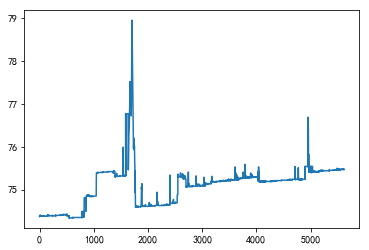

In [8]:
#新的数据进行保存，展示
buquan_disk = {}
for k,v in dict_buquan.items():
    buquan_disk.setdefault('时间',[]).append(k[:])
    buquan_disk.setdefault('容量',[]).append(v)
d_buquan_disk = pd.DataFrame(buquan_disk)
# d_buquan_disk.to_csv('c_buquan_disk.csv',index = False)
data = pd.read_csv('c_buquan_disk.csv')
plt.plot(data['容量'])
plt.show()

# 命中率数据

In [9]:
hit = pd.read_csv('../redis/hits.csv', sep=';',header = 0)
hit.sort_values('Time')
data_hit = hit['Value']
data_time = hit['Time']

In [10]:
dict_d = {}
dict_t = {}
for i in range(len(hit)):
    dict_d[data_time[i]] = data_hit[i]
    dict_t.setdefault(data_time[i][:-14],[]).append(data_hit[i])

In [11]:
d = {}
for k,v in dict_t.items():
    d.setdefault('时间',[]).append(k[:])
    d.setdefault('数量',[]).append(len(v))
d_new = pd.DataFrame(d)

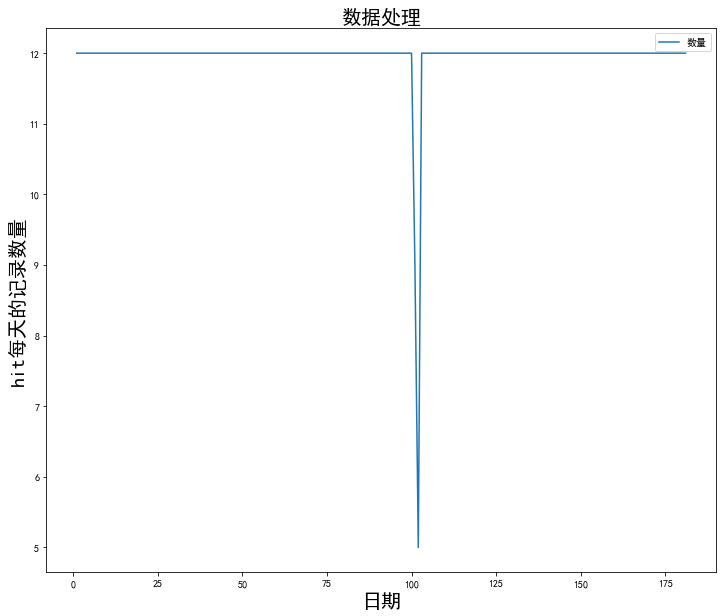

In [12]:
#数据统计缺失情况
plt.figure(figsize=(12, 10))
plt.plot(d_new[1:-1]['数量'])
plt.xlabel(U'日期',size = 20)
plt.ylabel(U'hit每天的记录数量',size = 20)
plt.title("数据处理",size = 20)

plt.tick_params(labelsize=10)
plt.legend()
# plt.savefig("pic/miss_每天记录数量.jpg")
plt.show() 

In [13]:
queshi = []
for i in range(len(d_new)):
    if d_new['数量'][i]<12:
        print(d_new['时间'][i],d_new['数量'][i])

2019-11-12 8
2020-02-21 9
2020-02-22 5
2020-05-12 4


In [14]:
dict_new = {}
for k,v in dict_d.items():
    k_new = k[:10]+':'+k[11:13]
    dict_new[k_new] = v

In [15]:
#数据补全
hours = ['00','02','04','06','08','10','12','14','16','18','20','22']
minutes = ['00']
dict_buquan = {}
for date in d_new['时间'][1:-1]:
    for hour in hours:
        time = date+':'+hour
        if time in dict_new.keys():
            dict_buquan[time] = dict_new[time]
        else:
            dict_buquan[time] = round(np.mean(dict_t[date]),7)

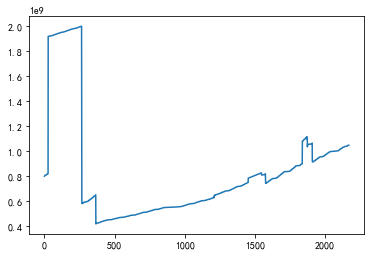

In [16]:
buquan_data = {}
for k,v in dict_buquan.items():
    buquan_data.setdefault('时间',[]).append(k[:])
    buquan_data.setdefault('容量',[]).append(v)
hit_buquan_data = pd.DataFrame(buquan_data)
# hit_buquan_data.to_csv('hit_buquan_disk.csv',index = False)
data = pd.read_csv('hit_buquan_disk.csv')
plt.plot(data['容量'])
plt.show()